# Envelop of moments and influence lines #

![figuur 1](../data_influence_line_3sup/Structure.gif)

In [3]:
import micropip
await micropip.install("ipympl")

ModuleNotFoundError: No module named 'micropip'

In [4]:
import sympy as sym
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import widgets, interact

%matplotlib widget

In [5]:
EI, x = sym.symbols('EI, x',real=True)

In [6]:
Av, Bv, Cv = sym.symbols('Av, Bv, Cv',real=True)
a, b, L1, L2 = sym.symbols('a, b, L1, L2',positive=True,real=True)
C1, C2, C3, C4 = sym.symbols('C1, C2, C3, C4')

##  Finding influence line for M ##

In [7]:
q = Bv * sym.SingularityFunction(x,L1,-1) - Av * sym.SingularityFunction(x,0,-1) - Cv * sym.SingularityFunction(x,L1+L2,-1)
C1, C2, C3, C4 = sym.symbols('C1, C2, C3, C4')
V = -sym.integrate(q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3 - sym.SingularityFunction(x,a,0)
w = sym.integrate(phi,x)+C4

In [8]:
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L1),0)
eq3 = sym.Eq(w.subs(x,L1+L2),0)
eq4 = sym.Eq(M.subs(x,0),0)
eq5 = sym.Eq(M.subs(x,L1+L2),0)
eq6 = sym.Eq(V.subs(x,-1),0)
eq7 = sym.Eq(V.subs(x,L1+L2+1),0)
sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
M_inf_numpy = sym.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sym.Piecewise))

## Find influence surface M for all load and moment locations

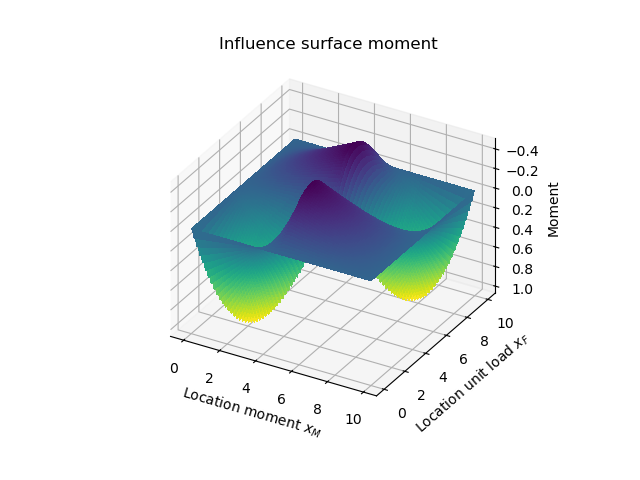

In [10]:
#function3d = w_sol.subs([(L1,5),(L2,5),(EI,5000)]).rewrite(sp.Piecewise).simplify()
#display(function3d)

a_input = np.linspace(0,10,100) #location moment
x_input = np.linspace(0,10,100) #location unit load

A_input,X_input = np.meshgrid(a_input,x_input)
Z = M_inf_numpy(5,5,A_input,5000,X_input)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(A_input, X_input, Z, rstride=1, cstride=1,
                cmap='viridis',antialiased=False)
ax.set_title('Influence surface moment');
ax.set_xlabel('Location moment $x_M$')
ax.set_ylabel('Location unit load $x_F$')
ax.set_zlabel('Moment');
ax.invert_zaxis()
#ax.view_init(elev=0, azim=-90)
ax.set_proj_type('ortho')

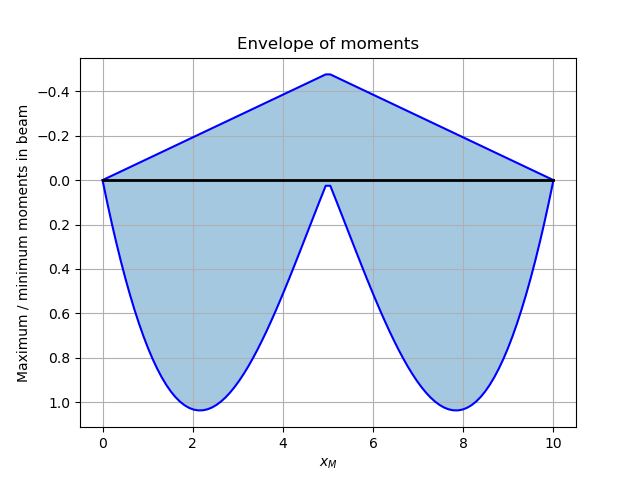

In [11]:
plt.figure()
Z_max = np.zeros(100)
Z_min = np.zeros(100)
for i in range(100):
    Z_max[i]=max(Z[:,i])
    Z_min[i]=min(Z[:,i])

plt.plot(x_input,Z_max,color='blue')
plt.plot(x_input,Z_min,color='blue')
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.fill_between(x_input,Z_min,Z_max,alpha=0.4)
plt.xlabel('$x_M$')
plt.ylabel('Maximum / minimum moments in beam')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Envelope of moments'
axs.set_title(title0);

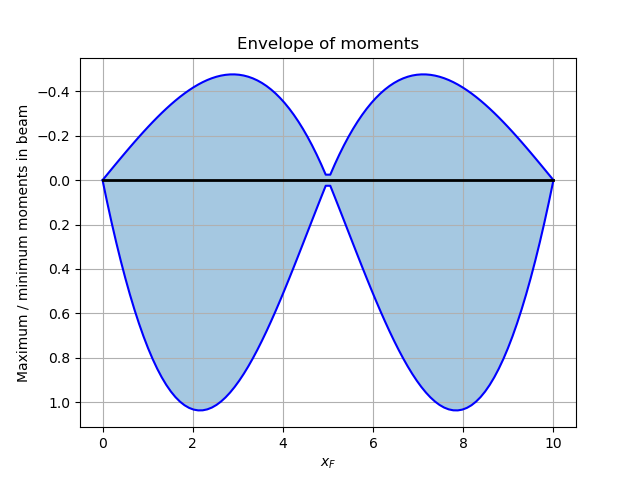

In [12]:
plt.figure()
Z_max = np.zeros(100)
Z_min = np.zeros(100)
for i in range(100):
    Z_max[i]=max(Z[i,:])
    Z_min[i]=min(Z[i,:])

plt.plot(x_input,Z_max,color='blue')
plt.plot(x_input,Z_min,color='blue')
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.fill_between(x_input,Z_min,Z_max,alpha=0.4)
plt.xlabel('$x_F$')
plt.ylabel('Maximum / minimum moments in beam')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Envelope of moments'
axs.set_title(title0);